# ML project

In this project we will explore a dataset with the following columns:
- **RowNumber**—corresponds to the record number.
- **CustomerId**—contains the identification number of the client.
- **Surname**—the surname of the customer.
- **CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to 
leave the bank.
- **Geography**—the customer’s location.
- **Gender**—the customer's gender.
- **Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts**—refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember**—active customers are less likely to leave the bank.
- **EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited**—whether or not the customer left the bank.
- **Complain**—customer has complaint or not.
- **Satisfaction Score**—Score provided by the customer for their complaint resolution.
- **Card Type**—type of card hold by the customer.
- **Points Earned**—the points earned by the customer for using credit card.


The idea for this project is a pedagogical one: try to explore as many techniques as you can. I understand you have jobs and families and things to do, so I will focus more on the rigor rather than the quantity. 

## Minimum requirements:

1. Explore the data statistics as you have learned in our and previous modules.
2. Validation techniques: train/validation/test split is the minimum and most common one, but feel free to explore others.
3. Choose a classification model and train it.
4. Check the metrics.


## Optional things to learn more (ask me if you had any questions):

1. Outlier detection
2. Feature selection and dimensionality reduction techniques
3. Imbalanced dataset techniques
4. Hyperparameter tunning
5. Statistical tests

### NOTE: it is important to comment with text *every step* to show that you understand what you are doing

In [1]:
# Import the Customer-Churn-Records.csv file and HAVE FUN
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hashlib

df = pd.read_csv('Customer-Churn-Records.csv')

In [2]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [6]:
# Verificar dados em falta
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [7]:
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [8]:

# Verificar valores ausentes
print(df.isnull().sum())

# Imputar valores ausentes (se houver)
# Exemplo: Imputar com a mediana para colunas numéricas
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Exemplo: Imputar com o valor mais frequente para colunas categóricas
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [9]:
# Verificar duplicatas
print(df.duplicated().sum())

# Remover duplicatas
df.drop_duplicates(inplace=True)


0


In [10]:
# Codificação de variáveis categóricas
data_encoded = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)


In [11]:
from sklearn.preprocessing import StandardScaler

# Selecionar variáveis numéricas
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned']

# Inicializar o escalador
scaler = StandardScaler()

# Ajustar e transformar os dados numéricos
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])


In [12]:
# Exemplo de tratamento de outliers utilizando Z-score
from scipy.stats import zscore

# Calcular o Z-score das variáveis numéricas
z_scores = np.abs(zscore(df[numeric_features]))

# Definir um limiar para identificar outliers
threshold = 3

# Identificar outliers
outliers = (z_scores > threshold).any(axis=1)

# Remover outliers
data_cleaned = df[~outliers]

print(data_cleaned.describe())

          RowNumber    CustomerId  CreditScore          Age       Tenure  \
count   9799.000000  9.799000e+03  9799.000000  9799.000000  9799.000000   
mean    4996.748240  1.569096e+07   650.586693    38.384427     5.011532   
std     2888.681023  7.191785e+04    96.341265     9.663426     2.890915   
min        1.000000  1.556570e+07   363.000000    18.000000     0.000000   
25%     2491.500000  1.562847e+07   584.000000    32.000000     3.000000   
50%     5001.000000  1.569101e+07   652.000000    37.000000     5.000000   
75%     7496.500000  1.575321e+07   718.000000    43.000000     7.000000   
max    10000.000000  1.581569e+07   850.000000    70.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    9799.000000    9799.000000  9799.000000     9799.000000   
mean    76472.676347       1.515461     0.705378        0.510052   
std     62407.290305       0.550882     0.455896        0.499924   
min         0.000000       1.000000     0.0

In [13]:
# Tamanho do dataset original
print(f"Tamanho original do dataset: {df.shape[0]}")

# Tamanho do dataset após remoção de outliers
print(f"Tamanho do dataset após remoção de outliers: {data_cleaned.shape[0]}")


Tamanho original do dataset: 10000
Tamanho do dataset após remoção de outliers: 9799


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


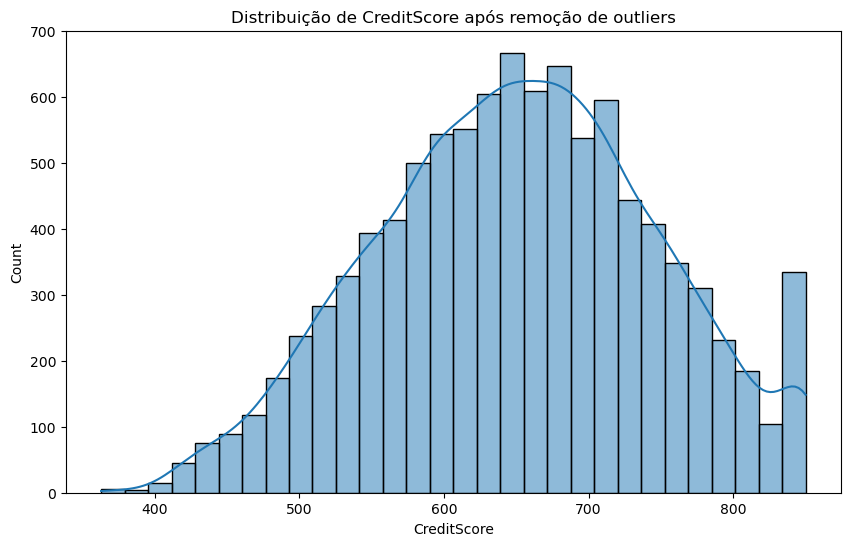

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


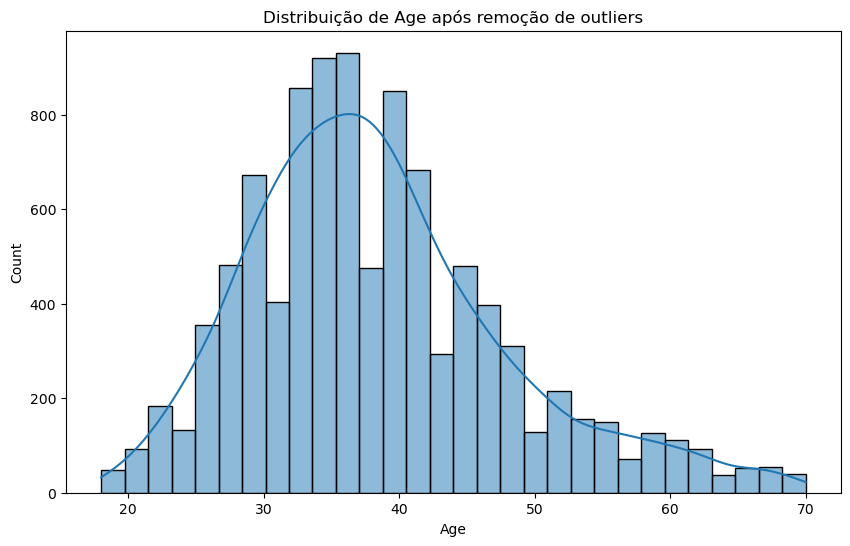

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


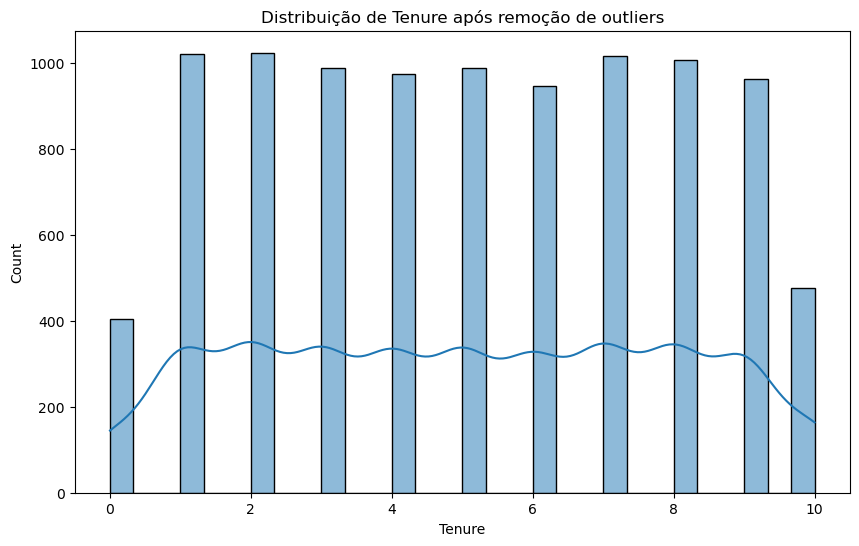

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


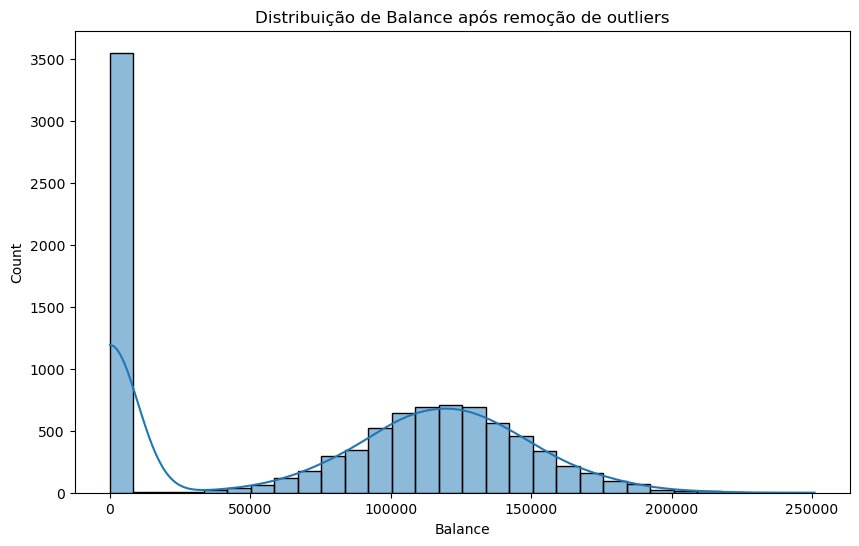

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


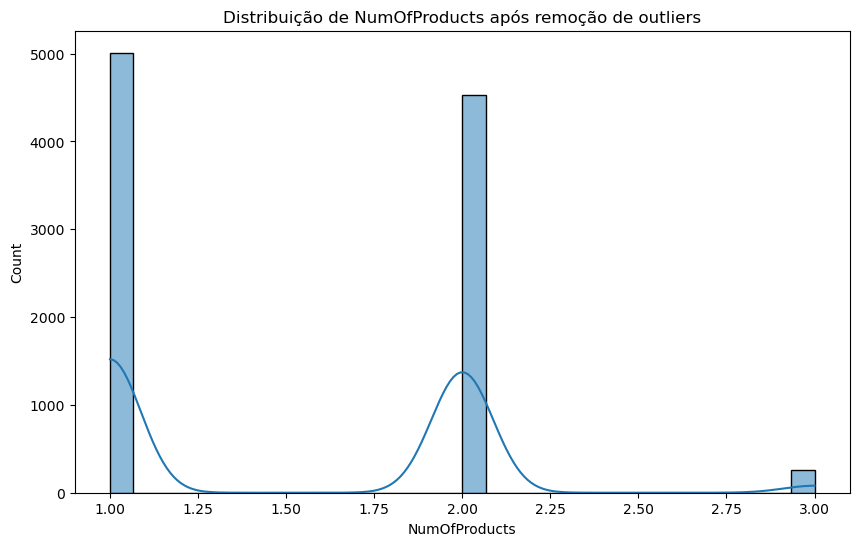

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


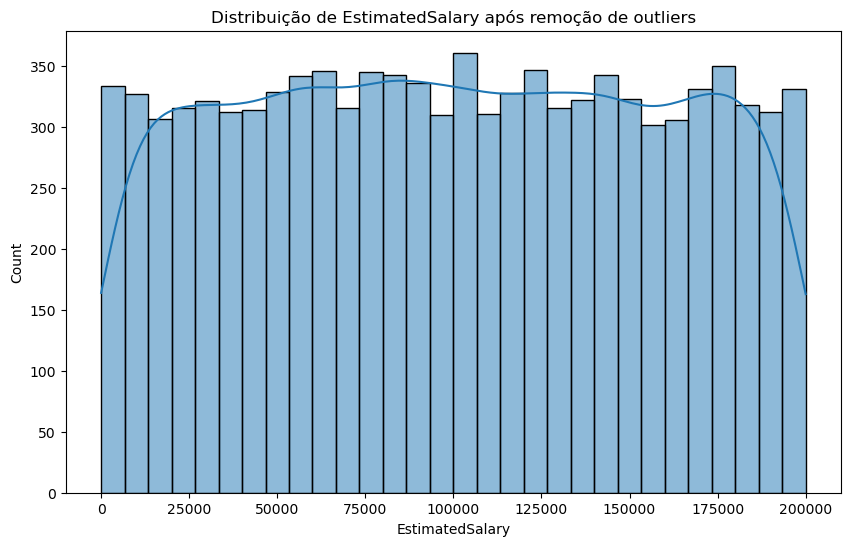

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


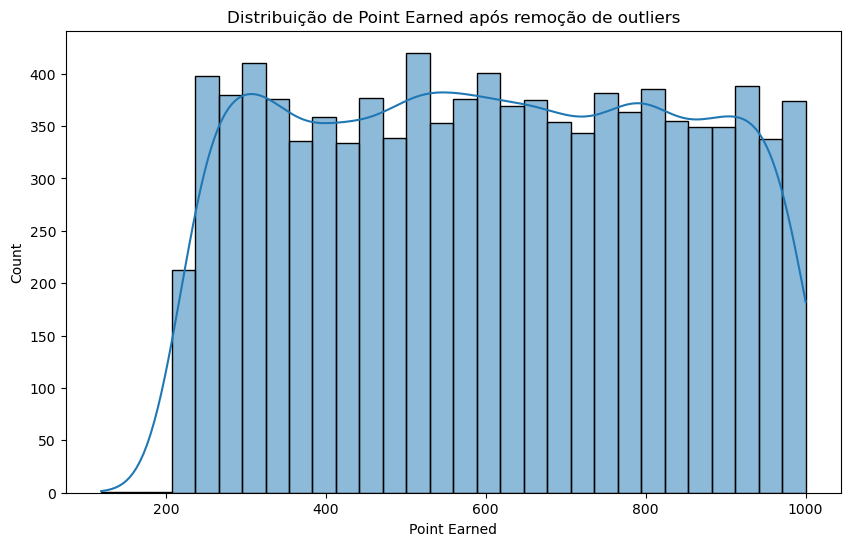

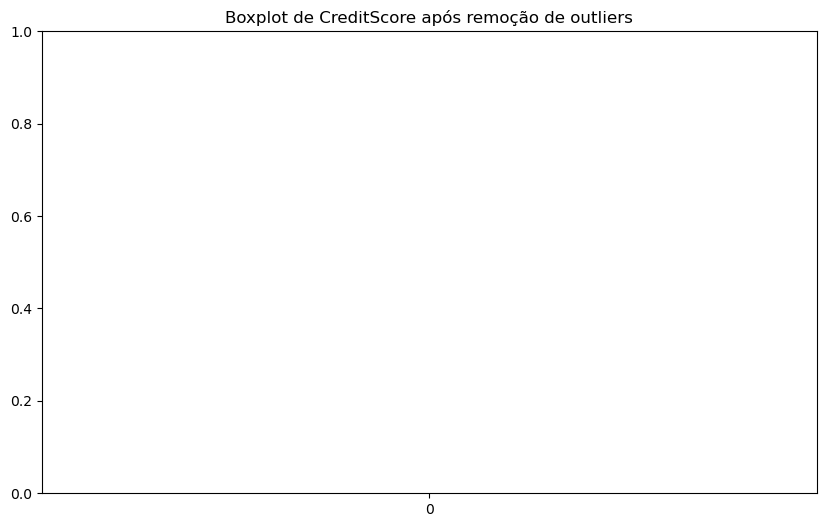

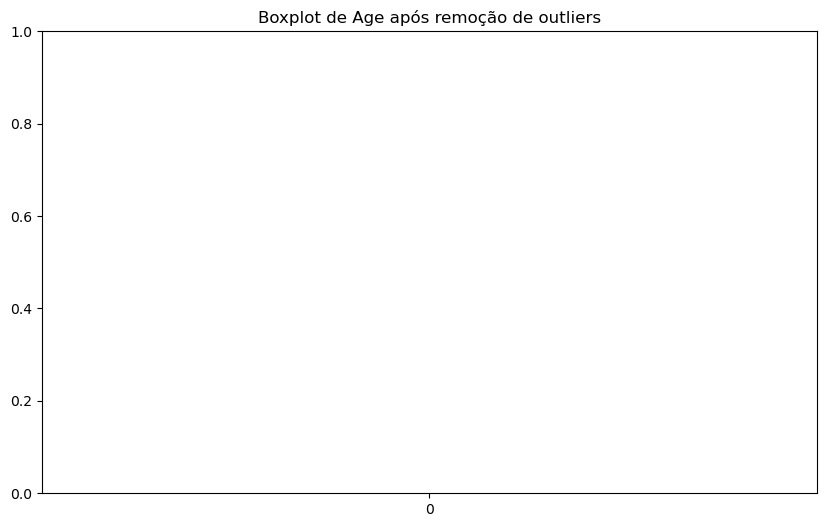

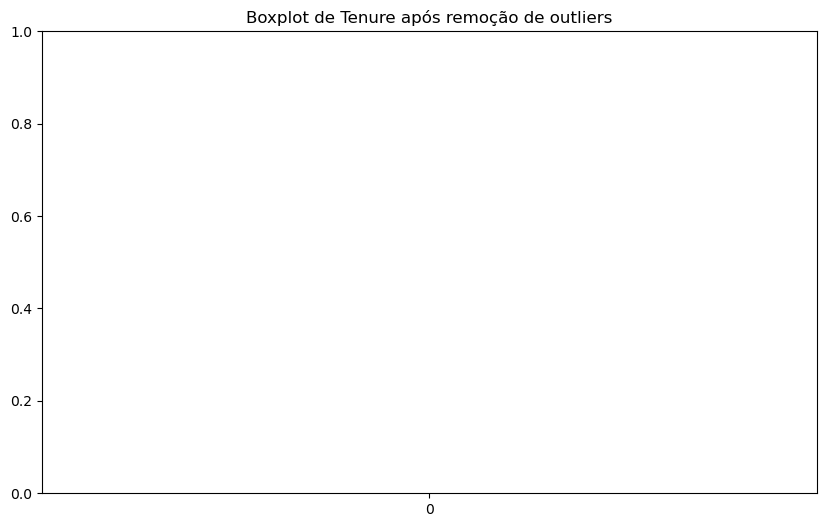

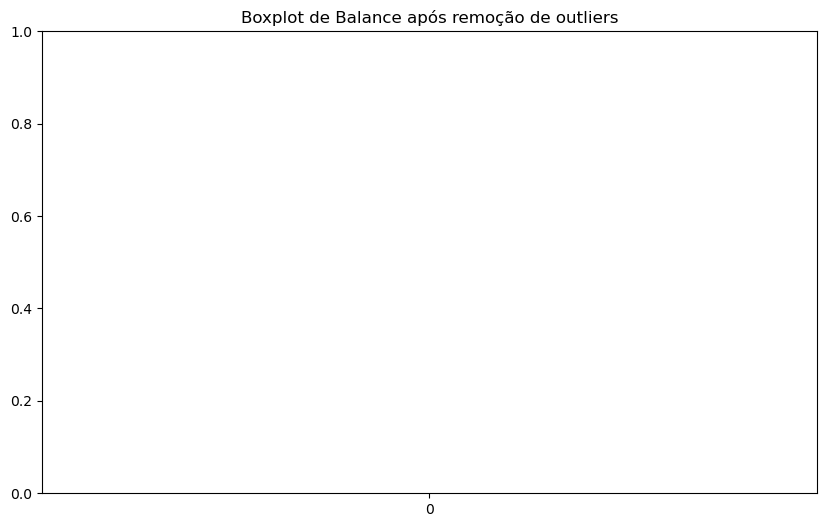

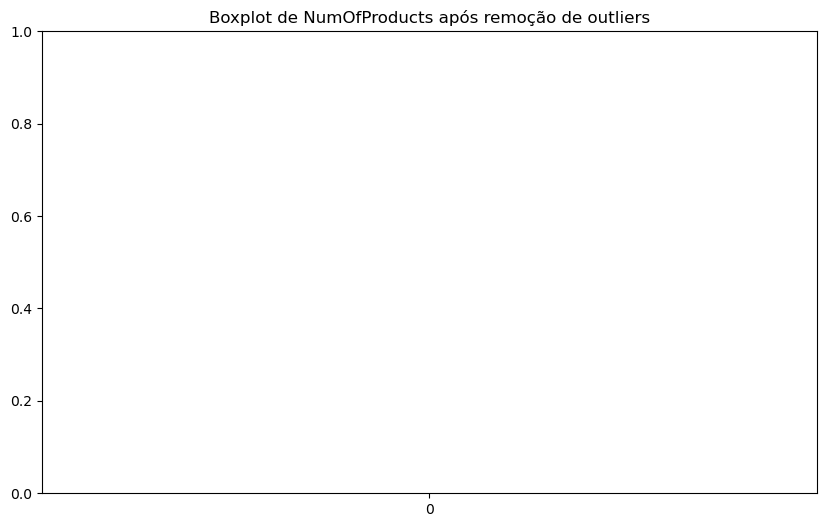

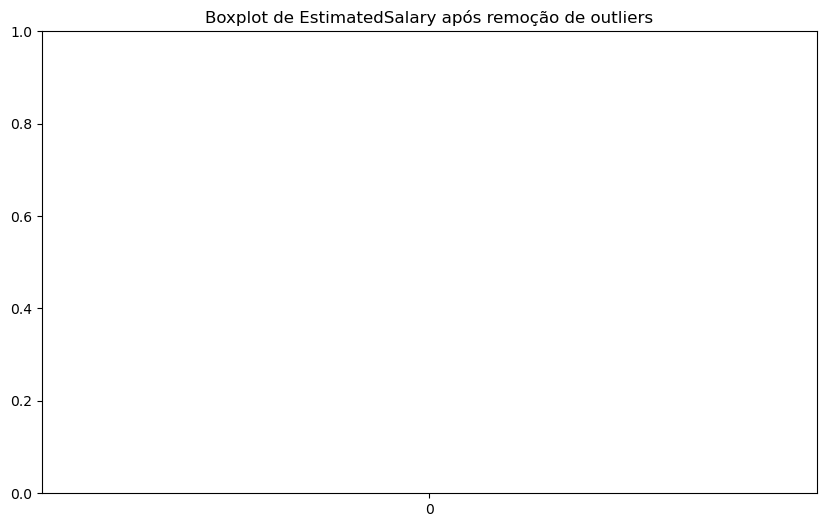

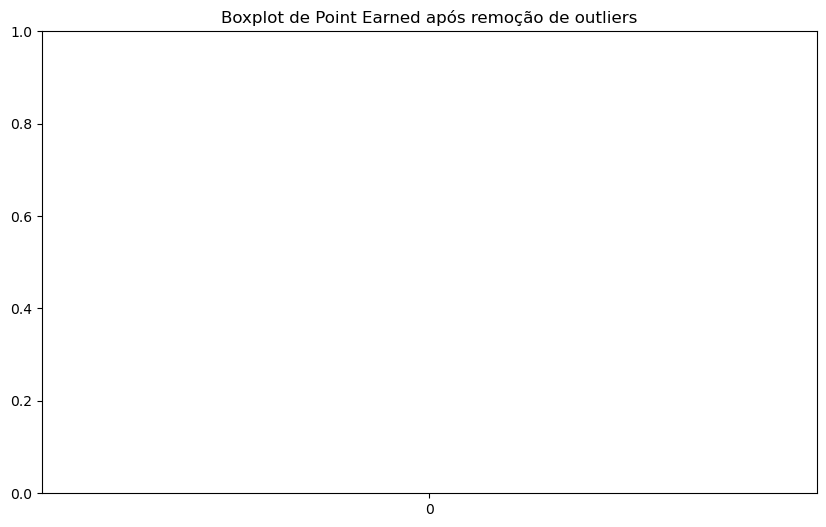

In [14]:
# Visualizar distribuições após remoção de outliers
import seaborn as sns
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data_cleaned[feature], bins=30, kde=True)
    plt.title(f'Distribuição de {feature} após remoção de outliers')
    plt.show()

# Visualizar boxplots para verificar remoção de outliers
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df=data_cleaned[feature])
    plt.title(f'Boxplot de {feature} após remoção de outliers')
    plt.show()


In [15]:
# Experimentar diferentes thresholds
for threshold in [2, 2.5, 3]:
    z_scores = np.abs(zscore(df[numeric_features]))
    outliers = (z_scores > threshold).any(axis=1)
    data_cleaned = df[~outliers]
    print(f"Threshold: {threshold}")
    print(f"Tamanho do dataset após remoção de outliers: {data_cleaned.shape[0]}")
    print(data_cleaned.describe())


Threshold: 2
Tamanho do dataset após remoção de outliers: 8694
          RowNumber    CustomerId  CreditScore          Age       Tenure  \
count   8694.000000  8.694000e+03  8694.000000  8694.000000  8694.000000   
mean    4999.023925  1.569086e+07   650.036807    37.210605     5.015988   
std     2891.142563  7.189266e+04    86.767895     8.279967     2.891989   
min        1.000000  1.556570e+07   458.000000    18.000000     0.000000   
25%     2482.250000  1.562815e+07   586.000000    31.000000     3.000000   
50%     4998.500000  1.569163e+07   651.000000    37.000000     5.000000   
75%     7489.750000  1.575324e+07   713.000000    42.000000     8.000000   
max    10000.000000  1.581569e+07   843.000000    59.000000    10.000000   

            Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    8694.00000    8694.000000  8694.000000     8694.000000   
mean    76049.92242       1.478491     0.704969        0.502761   
std     62126.60499       0.499566     0.456083    

In [16]:

# Calcular o IQR para cada variável numérica
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
# Definir um limiar para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = ((df[numeric_features] < lower_bound) | (df[numeric_features] > upper_bound)).any(axis=1)

# Remover outliers
data_cleaned = df[~outliers]

print(f"Tamanho original do dataset: {df.shape[0]}")
print(f"Tamanho do dataset após remoção de outliers: {data_cleaned.shape[0]}")



Tamanho original do dataset: 10000
Tamanho do dataset após remoção de outliers: 9568


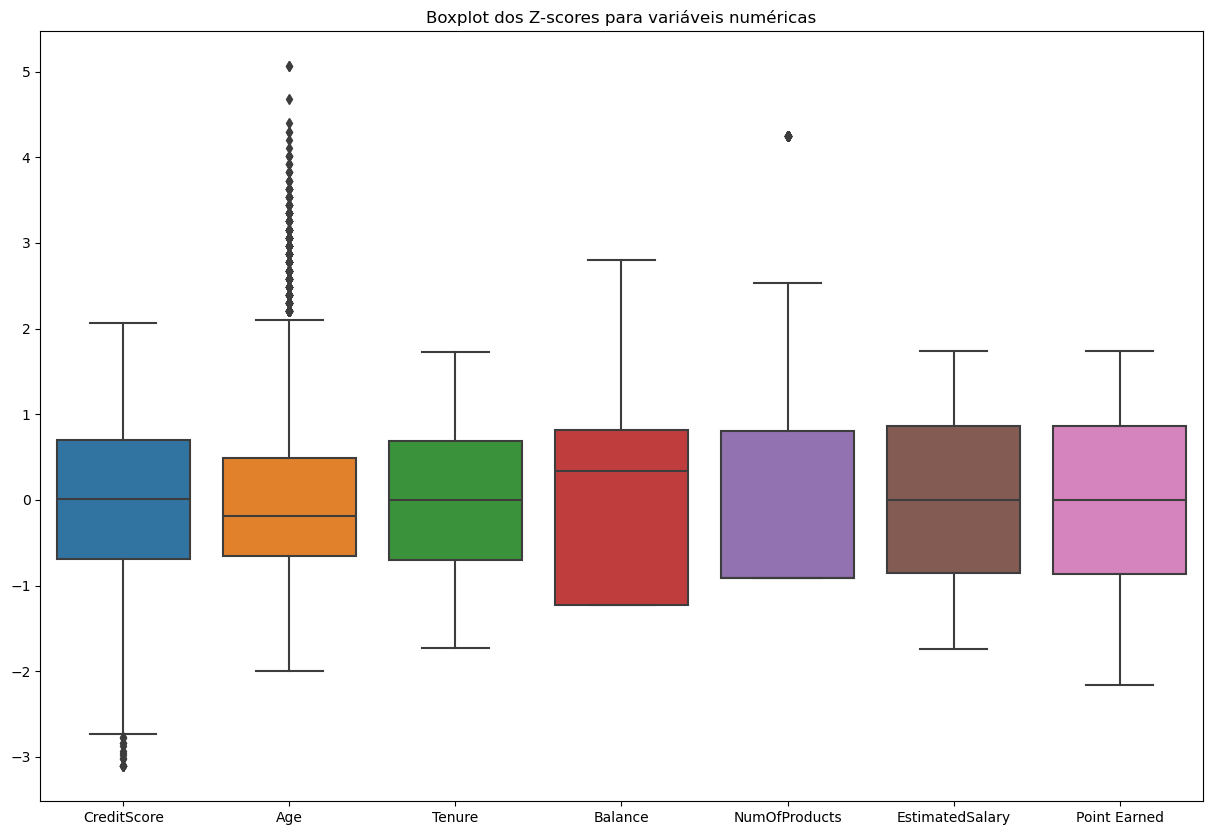

In [17]:
# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Calcular o Z-score das variáveis numéricas
z_scores = zscore(df[numeric_features])

# Plotar Z-scores
plt.figure(figsize=(15, 10))
sns.boxplot(data=z_scores)
plt.title('Boxplot dos Z-scores para variáveis numéricas')
plt.show()


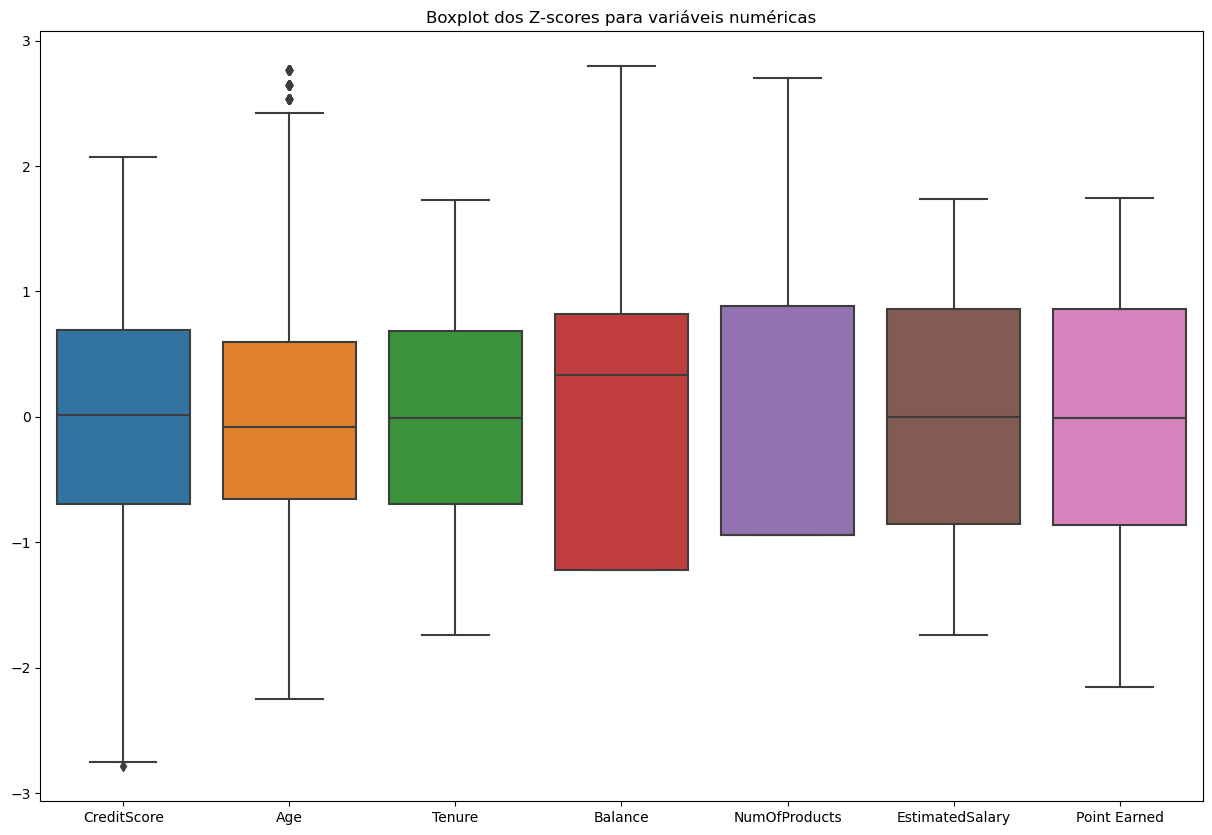

In [18]:
# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Calcular o Z-score das variáveis numéricas
z_scores = zscore(data_cleaned[numeric_features])

# Plotar Z-scores
plt.figure(figsize=(15, 10))
sns.boxplot(data=z_scores)
plt.title('Boxplot dos Z-scores para variáveis numéricas')
plt.show()

In [19]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Identificar colunas categóricas
categorical_features = ['Geography', 'Gender', 'Card Type']
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Points Earned']

# Aplicar one-hot encoding nas colunas categóricas
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_features, drop_first=True)

# Separar as features e o alvo
X = data_encoded.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data_encoded['Exited']

# Dividir os dados em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Escalar as variáveis numéricas
scaler = StandardScaler()

# Ajustar o escalador no conjunto de treino e transformar os dados
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Inicializar o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# Treinar o modelo no conjunto de treino
model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de validação
y_val_pred = model.predict(X_val_scaled)

# Calcular métricas de avaliação
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Métricas de Avaliação no Conjunto de Validação:")
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de Confusão e Relatório de Classificação
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print("Matriz de Confusão:")
print(conf_matrix)

print("Relatório de Classificação:")
print(class_report)

# Fazer previsões no conjunto de teste
y_test_pred = model.predict(X_test_scaled)

# Calcular métricas de avaliação
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Métricas de Avaliação no Conjunto de Teste:")
print(f"Acurácia: {test_accuracy:.2f}")
print(f"Precisão: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1-Score: {test_f1:.2f}")

# Matriz de Confusão e Relatório de Classificação
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("Matriz de Confusão:")
print(test_conf_matrix)

print("Relatório de Classificação:")
print(test_class_report)


Métricas de Avaliação no Conjunto de Validação:
Acurácia: 1.00
Precisão: 0.99
Recall: 1.00
F1-Score: 1.00
Matriz de Confusão:
[[1149    2]
 [   0  284]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1151
           1       0.99      1.00      1.00       284

    accuracy                           1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435

Métricas de Avaliação no Conjunto de Teste:
Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00
Matriz de Confusão:
[[1151    1]
 [   0  284]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1152
           1       1.00      1.00      1.00       284

    accuracy                           1.00      1436
   macro avg       1.00      1.00      1.00      1436
weighted avg       1.00      1.00      1.00

In [20]:
# Importar a biblioteca SMOTE
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE ao conjunto de treino
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Inicializar e treinar o modelo de Random Forest
model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Fazer previsões no conjunto de validação
y_val_pred_balanced = model_balanced.predict(X_val_scaled)

# Calcular métricas de avaliação no conjunto de validação
accuracy_balanced = accuracy_score(y_val, y_val_pred_balanced)
precision_balanced = precision_score(y_val, y_val_pred_balanced)
recall_balanced = recall_score(y_val, y_val_pred_balanced)
f1_balanced = f1_score(y_val, y_val_pred_balanced)

print("Métricas de Avaliação no Conjunto de Validação (Após Balanceamento):")
print(f"Acurácia: {accuracy_balanced:.2f}")
print(f"Precisão: {precision_balanced:.2f}")
print(f"Recall: {recall_balanced:.2f}")
print(f"F1-Score: {f1_balanced:.2f}")

# Matriz de Confusão e Relatório de Classificação
conf_matrix_balanced = confusion_matrix(y_val, y_val_pred_balanced)
class_report_balanced = classification_report(y_val, y_val_pred_balanced)

print("Matriz de Confusão (Após Balanceamento):")
print(conf_matrix_balanced)

print("Relatório de Classificação (Após Balanceamento):")
print(class_report_balanced)


Métricas de Avaliação no Conjunto de Validação (Após Balanceamento):
Acurácia: 1.00
Precisão: 0.99
Recall: 1.00
F1-Score: 1.00
Matriz de Confusão (Após Balanceamento):
[[1149    2]
 [   0  284]]
Relatório de Classificação (Após Balanceamento):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1151
           1       0.99      1.00      1.00       284

    accuracy                           1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435



In [21]:
"""Precisão (Precision):

A precisão é a proporção de exemplos positivos corretamente classificados pelo modelo entre todos os exemplos classificados como positivos. Um valor de precisão de 1.00 significa que o modelo não fez nenhum falso positivo.
Recall:

O recall (também conhecido como sensibilidade) é a proporção de exemplos positivos corretamente classificados pelo modelo entre todos os exemplos que são realmente positivos. Um recall de 1.00 indica que o modelo não perdeu nenhum exemplo positivo (nenhum falso negativo).
F1-score:

O F1-score é a média harmônica da precisão e do recall. Ele fornece uma medida de desempenho que equilibra a precisão e o recall. Um F1-score de 1.00 indica um ótimo equilíbrio entre precisão e recall.
Acurácia (Accuracy):

A acurácia é a proporção de exemplos corretamente classificados pelo modelo entre todos os exemplos. Uma acurácia de 1.00 significa que o modelo classificou corretamente todos os exemplos"""

'Precisão (Precision):\n\nA precisão é a proporção de exemplos positivos corretamente classificados pelo modelo entre todos os exemplos classificados como positivos. Um valor de precisão de 1.00 significa que o modelo não fez nenhum falso positivo.\nRecall:\n\nO recall (também conhecido como sensibilidade) é a proporção de exemplos positivos corretamente classificados pelo modelo entre todos os exemplos que são realmente positivos. Um recall de 1.00 indica que o modelo não perdeu nenhum exemplo positivo (nenhum falso negativo).\nF1-score:\n\nO F1-score é a média harmônica da precisão e do recall. Ele fornece uma medida de desempenho que equilibra a precisão e o recall. Um F1-score de 1.00 indica um ótimo equilíbrio entre precisão e recall.\nAcurácia (Accuracy):\n\nA acurácia é a proporção de exemplos corretamente classificados pelo modelo entre todos os exemplos. Uma acurácia de 1.00 significa que o modelo classificou corretamente todos os exemplos'

In [22]:
##Extra##

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Inicializar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
model.fit(X_train_scaled, y_train)

# Obter a importância das características
feature_importances = model.feature_importances_

# Selecionar as características mais importantes
selector = SelectFromModel(model, threshold=0.1)  # Escolha do threshold
selector.fit(X_train_scaled, y_train)

# Aplicar a seleção de características aos conjuntos de treino e validação
X_train_selected = selector.transform(X_train_scaled)
X_val_selected = selector.transform(X_val_scaled)

selected_features = X.columns[selector.get_support()]
print("Características selecionadas:", selected_features)

Características selecionadas: Index(['Complain'], dtype='object')


In [30]:
from sklearn.decomposition import PCA

# Inicializar o PCA
pca = PCA(n_components=2)  # Escolha do número de componentes principais

# Ajustar e transformar os dados de treino e validação
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print("Variância explicada pelos componentes principais:", explained_variance_ratio)

Variância explicada pelos componentes principais: [0.10710151 0.08060497]


In [31]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE ao conjunto de treino
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir uma grade de hiperparâmetros menor
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Inicializar o modelo Random Forest
model = RandomForestClassifier(random_state=42)

# Inicializar a pesquisa em grade com amostragem aleatória
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=4, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Executar a pesquisa em grade no conjunto de treino
random_search.fit(X_train_balanced, y_train_balanced)

# Melhores hiperparâmetros
best_params = random_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Melhor pontuação alcançada durante a busca em grade
best_score = random_search.best_score_
print("Melhor pontuação durante a busca em grade:", best_score)


Melhores hiperparâmetros: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Melhor pontuação durante a busca em grade: 0.9988834179228846


In [34]:
from scipy.stats import ttest_ind
group1 = np.random.normal(loc=10, scale=5, size=100)
group2 = np.random.normal(loc=12, scale=5, size=100)
# Realizar o teste t entre dois grupos
stat, p_value = ttest_ind(group1, group2)

# Interpretar os resultados
if p_value < 0.05:
    print("Há uma diferença estatisticamente significativa entre os grupos.")
else:
    print("Não há uma diferença estatisticamente significativa entre os grupos.")

# Estatística do teste e valor p
print("Estatística do teste t:", stat)
print("Valor p:", p_value)


Há uma diferença estatisticamente significativa entre os grupos.
Estatística do teste t: -5.15086911899233
Valor p: 6.241685928328724e-07
